In [10]:
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [35]:
def downsampling(s_raw, f_s, f_ds=1_000):
    if f_s % f_ds == 0:
        downsample_factor = f_s // f_ds
        s_ds = signal.decimate(s_raw, downsample_factor)
    else:
        nearest_downsample_factor = round(f_s / f_ds)
        new_sample_rate = f_s // nearest_downsample_factor
        
        if new_sample_rate == 0:
            raise ValueError("Der berechnete Downsample-Faktor ist nicht sinnvoll. Überprüfen Sie die Eingabewerte.")

        s_ds = signal.decimate(s_raw, nearest_downsample_factor,ftype='fir')
        print("Not sufficient good implemented yet")
    return s_ds

def fir_filter(s_in, f_s, center_freq=50, passband_width=1.4, num_taps=10_000):
    band = [center_freq - passband_width / 2, center_freq + passband_width / 2]
    filter_taps = signal.firwin(num_taps, band, pass_zero=False, fs=f_s)
    s_out = signal.filtfilt(filter_taps, [1.0], s_in)

    # delete samples at start and end
    s_out[-num_taps // 2 :] = np.nan
    s_out[: num_taps // 2] = np.nan

    return s_out

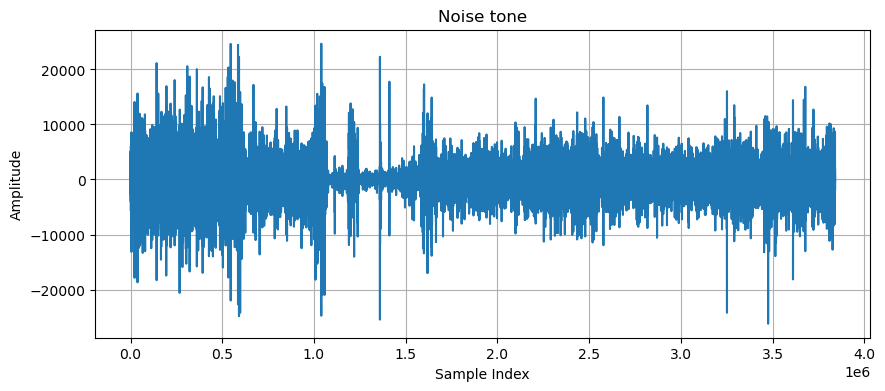

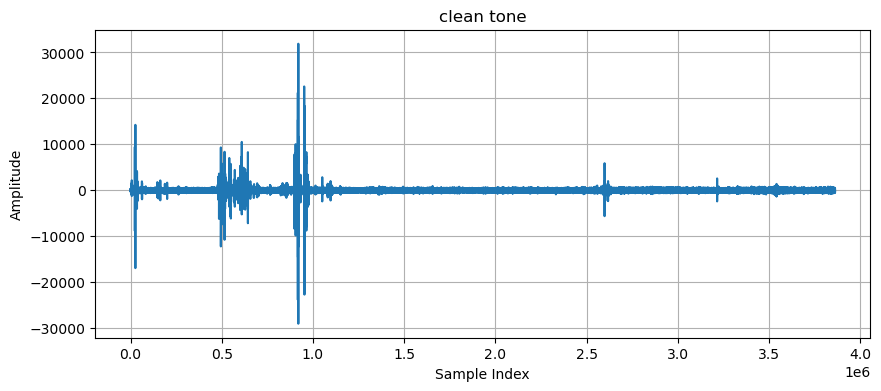

In [13]:
noise_fs, noise_data = wavfile.read('Wuhan_ENF_data/01.wav')
clean_fs, clean_data = wavfile.read('Wuhan_ENF_data/001.wav')

n_noise = np.arange(len(noise_data))
n_clean = np.arange(len(clean_data))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, noise_data)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_clean, clean_data)
plt.title('clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

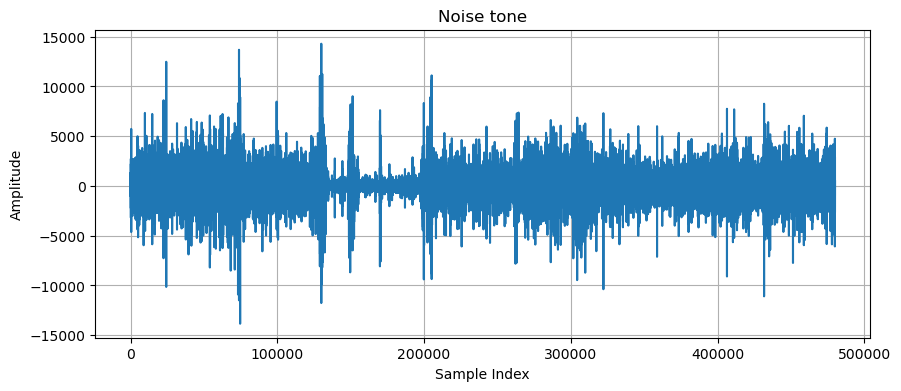

1000.0


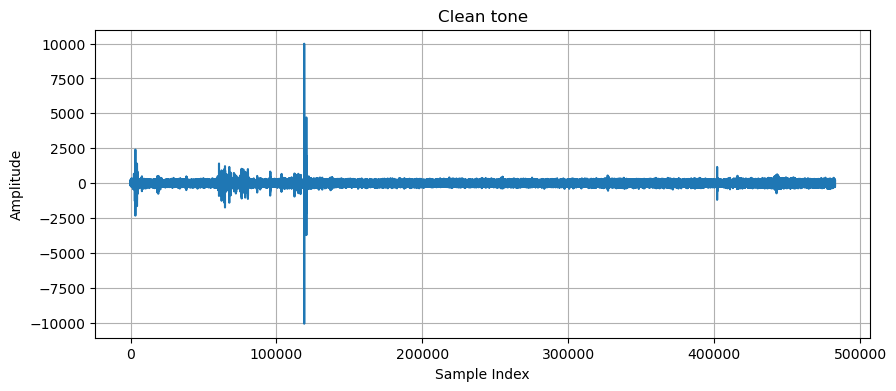

In [41]:
downsampled_noise = downsampling(noise_data, noise_fs, f_ds=1000)
downsampled_clean = downsampling(clean_data, clean_fs, f_ds=1000)

n_noise = np.arange(len(downsampled_noise))
n_clean = np.arange(len(downsampled_clean))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, downsampled_noise)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

sample_rate = len(downsampled_noise)/480
print(sample_rate)

plt.figure(figsize=(10, 4))
plt.plot(n_clean, downsampled_clean)
plt.title('Clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


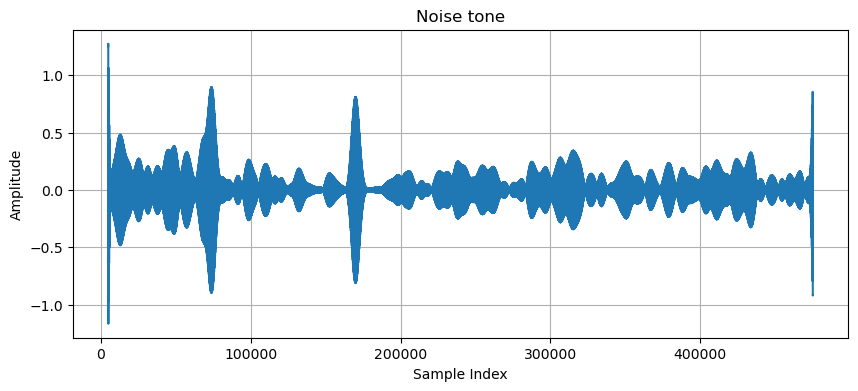

In [40]:
bandpass_noise = fir_filter(downsampled_noise, noise_fs, center_freq=50, passband_width=1.4, num_taps=10_000)
n_noise = np.arange(len(bandpass_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, bandpass_noise)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

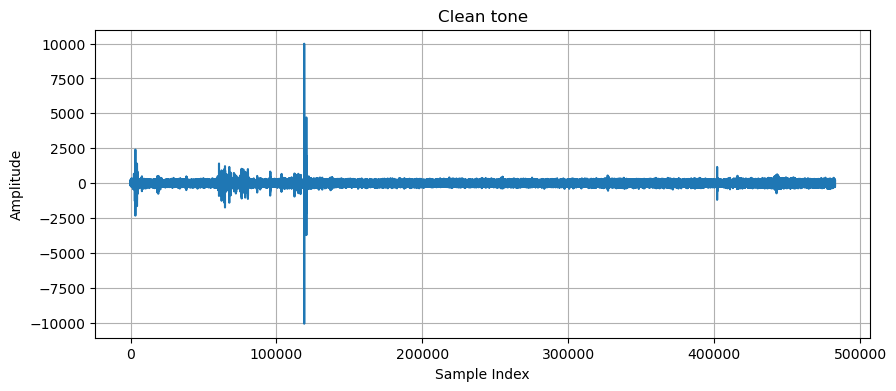

In [42]:
bandpass_clean = fir_filter(downsampled_clean, clean_fs, center_freq=50, passband_width=1.4, num_taps=10_000)
n_clean = np.arange(len(bandpass_clean))

plt.figure(figsize=(10, 4))
plt.plot(n_clean, downsampled_clean)
plt.title('Clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()